In [17]:
import os
import re
import pandas as pd

In [18]:
# satisfiability of local test instances
expected_res = pd.DataFrame({
    'name': ['6-4-6-sc2018.cnf',
             '6s166.cnf',
             '20-100-lambda100-49_sat.cnf',
             '53-129696.cnf',
             'aws-encryption-sdk-c:aws_cryptosdk_serialize_frame.dimacs',
             'BubbleVsPancakeSort_6_6.cnf',
             'BZ2File_write_11.cnf',
             'C208_FA_UT_3254.cnf',
             'ecgrid6x240_shuffled.cnf',
             'large_trivial_sat.cnf',
             'mdp-36-16-sat.cnf',
             'mp1-Nb6T06.cnf',
             'php14e14.cnf',
             'reconf20_20_grid10_1_6141.cnf',
             'SAT_dat.k80.cnf',
             'satch2ways12u.cnf',
             'school1_nsh.col.14.cnf',
             'SCPC-500-10.cnf',
             'shift1add.28943.cnf',
             'sin-mitern29.cnf',
             'urquhart3_25bis.shuffled.cnf',
             'worker_50_50_50_0.85.cnf',
             'asconhashv12_opt64_H8_M2-1yQCyA0j_m2_6.c.cnf',
             'SCPC-700-84.cnf',
             'SCPC-700-80.cnf'],
    'satisfiability': ['SAT',
                       'UNSAT',
                       'SAT',
                       'SAT',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'SAT',
                       'SAT',
                       'UNSAT',
                       'UNKNOWN',
                       'UNSAT',
                       'UNSAT?',
                       'UNSAT',
                       'UNKNOWN',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'UNSAT',
                       'SAT',
                       'SAT',
                       'SAT']
})

expected_res

,name,satisfiability
0,6-4-6-sc2018.cnf,SAT
1,6s166.cnf,UNSAT
2,20-100-lambda100-49_sat.cnf,SAT
3,53-129696.cnf,SAT
4,aws-encryption-sdk-c:aws_cryptosdk_serialize_f...,UNSAT
5,BubbleVsPancakeSort_6_6.cnf,UNSAT
6,BZ2File_write_11.cnf,UNSAT
7,C208_FA_UT_3254.cnf,UNSAT
8,ecgrid6x240_shuffled.cnf,UNSAT
9,large_trivial_sat.cnf,SAT


In [19]:
import os
dirs = next(os.walk('../logs'))[1]
data = {'name':[],
        'result':[],
        'memory':[],
        'runtime':[]}
for name in dirs:
    file = open(f"../logs/{name}/out_file", 'r')
    log = file.read().__str__()

    # get maximal memory used
    globmems = re.findall('globmem=(.*)GB', log)
    if not globmems: globmems = [0]
    globmems = max([float(x) for x in globmems])

    # get result
    result = 0
    if re.search('s SATISFIABLE', log):
        result = 1
    elif re.search('s UNSATISFIABLE', log):
        result = -1

    # get runtime
    runtime = 0.
    s = re.search("RESPONSE_TIME #[0-9]+ ([0-9]+.[0-9]+)", log)
    if s:
        runtime = float(s.groups()[0])

    # add data
    data['name'].append(name)
    data['result'].append(result)
    data['memory'].append(globmems)
    data['runtime'].append(runtime)

df = pd.DataFrame(data)
df = df.merge(expected_res, how='inner', on='name')
df


,name,result,memory,runtime,satisfiability
0,asconhashv12_opt64_H8_M2-1yQCyA0j_m2_6.c.cnf,0,0.94,0.000000,SAT
1,school1_nsh.col.14.cnf,0,0.71,0.000000,UNKNOWN
2,shift1add.28943.cnf,-1,1.45,7.885296,UNSAT
3,20-100-lambda100-49_sat.cnf,1,0.47,27.204788,SAT
4,ecgrid6x240_shuffled.cnf,0,0.50,0.000000,UNSAT
5,6s166.cnf,-1,0.37,146.894150,UNSAT
6,53-129696.cnf,0,0.87,0.000000,SAT
7,large_trivial_sat.cnf,1,0.00,0.761500,SAT
8,php14e14.cnf,0,0.55,0.000000,UNKNOWN
9,worker_50_50_50_0.85.cnf,0,1.07,0.000000,UNSAT


In [20]:
# check results
res_map = {'SAT':1,
           'UNSAT':-1}
correct = True
for idx, row in df.iterrows():
    res = row['result']
    sat = row['satisfiability']
    if res == 0 or sat == 'UNKNOWN':
        continue
    if res != res_map[sat]:
        correct = False
        break

correct
    

True

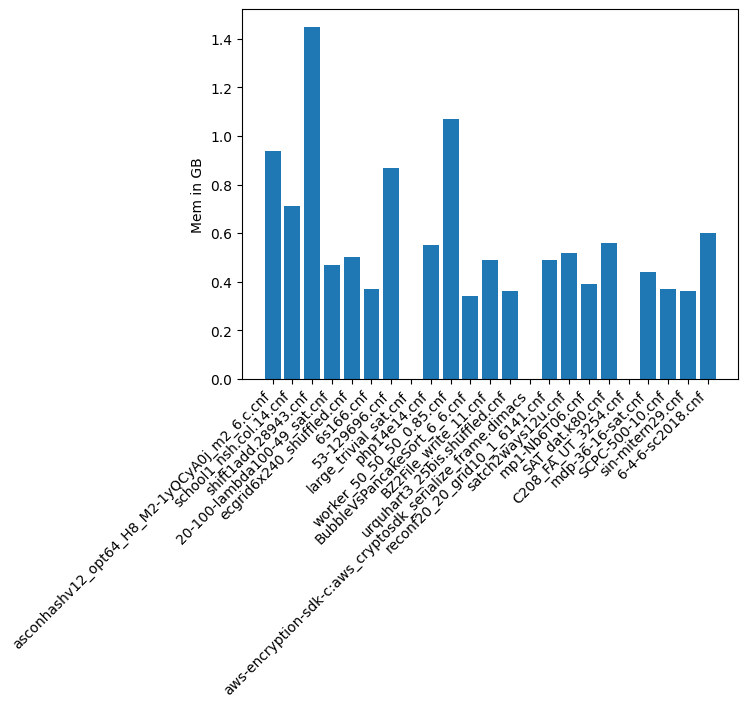

In [21]:
from matplotlib import pyplot as plt

plt.bar(df['name'], df['memory'])
plt.ylabel('Mem in GB')
plt.xticks(rotation=45, ha="right")
plt.show()